# Implementation of random forest classifier
Implemented from scikit learn

Now we need to load a dataset from our extracted features.

In [33]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
class_names = ['open_broken', 'broken', 'closed_sealed', 'closed_seal_broken']

path = 'analysis/feature_list.csv'
path_test = 'analysis/feature_list_test.csv'
beer_df = pd.read_csv(path)
beer_df.loc[beer_df['Label'] == 'open_broken', 'Label'] = 0
beer_df.loc[beer_df['Label'] == 'broken', 'Label'] = 1
beer_df.loc[beer_df['Label'] == 'closed_sealed', 'Label'] = 2
beer_df.loc[beer_df['Label'] == 'closed_seal_broken', 'Label'] = 3


# Divide the dataset in data columns and one label column
#all but the last column
data = beer_df.iloc[:,:-1]

#convert all cells from str to float, neccessary because of str type labels
data = data.astype(float)

# take just the last column that contains labels
label = beer_df.iloc[:,-1]

#convert to np array and int type 
data = np.asarray(data)
label = np.asarray(label)
label = label.astype('int')


We split the data and label into test and training data in order to evaluate the accuracy of our classifier.


In [38]:
from sklearn.model_selection import train_test_split 
data_train, data_test, label_train, label_test = train_test_split(data,label, test_size=0.2,
                                                   random_state=42)

print('data_train: ',data_train.shape, 'label_train: ', label_train.shape)
print('data_test: ', data_test.shape, 'label_test: ', label_test.shape)




data_train:  (1052, 8) label_train:  (1052,)
data_test:  (264, 8) label_test:  (264,)


Here by uncommenting a feature list of a test can be inserted into data_test and label_test

In [35]:
# test_df = pd.read_csv(path_test)
# test_df.loc[test_df['Label'] == 'open_broken', 'Label'] = 0
# test_df.loc[test_df['Label'] == 'broken', 'Label'] = 1
# test_df.loc[test_df['Label'] == 'closed_sealed', 'Label'] = 2
# test_df.loc[test_df['Label'] == 'closed_seal_broken', 'Label'] = 3

# #Divide the dataset in data columns and one label column
# # all but the last column
# data_test = test_df.iloc[:,:-1]

# #convert all cells from str to float, neccessary because of str type labels
# data_test = data_test.astype(float)

# # take just the last column that contains labels
# label_test = test_df.iloc[:,-1]

# #convert to np array
# data_test = np.asarray(data_test)
# label_test = np.asarray(label_test)
# label_test = label_test.astype('int')
# print('data_test: ', data_test.shape, 'label_test: ', label_test.shape)

data_test:  (4, 8) label_test:  (4,)


Next Step is to call the function for classification.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

# initialize the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model
random_forest.fit(data_train, label_train)

# make predictions
label_pred = random_forest.predict(data_train)

Plot the confusion matrix and report

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
for i,elmt in enumerate(class_names):
    print(i,' means: ',elmt)
print("Score is:" ,random_forest.score(data_test, label_test))

y_pred_test = random_forest.predict(data_test) 

print(confusion_matrix(label_test,y_pred_test)) 
print(classification_report(label_test,y_pred_test))

0  means:  open_broken
1  means:  broken
2  means:  closed_sealed
3  means:  closed_seal_broken
Score is: 0.8939393939393939
[[68  0  0  0]
 [ 0 70  0  0]
 [ 1  0 44 17]
 [ 1  0  9 54]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        68
           1       1.00      1.00      1.00        70
           2       0.83      0.71      0.77        62
           3       0.76      0.84      0.80        64

    accuracy                           0.89       264
   macro avg       0.89      0.89      0.89       264
weighted avg       0.89      0.89      0.89       264



Draw some trees as example

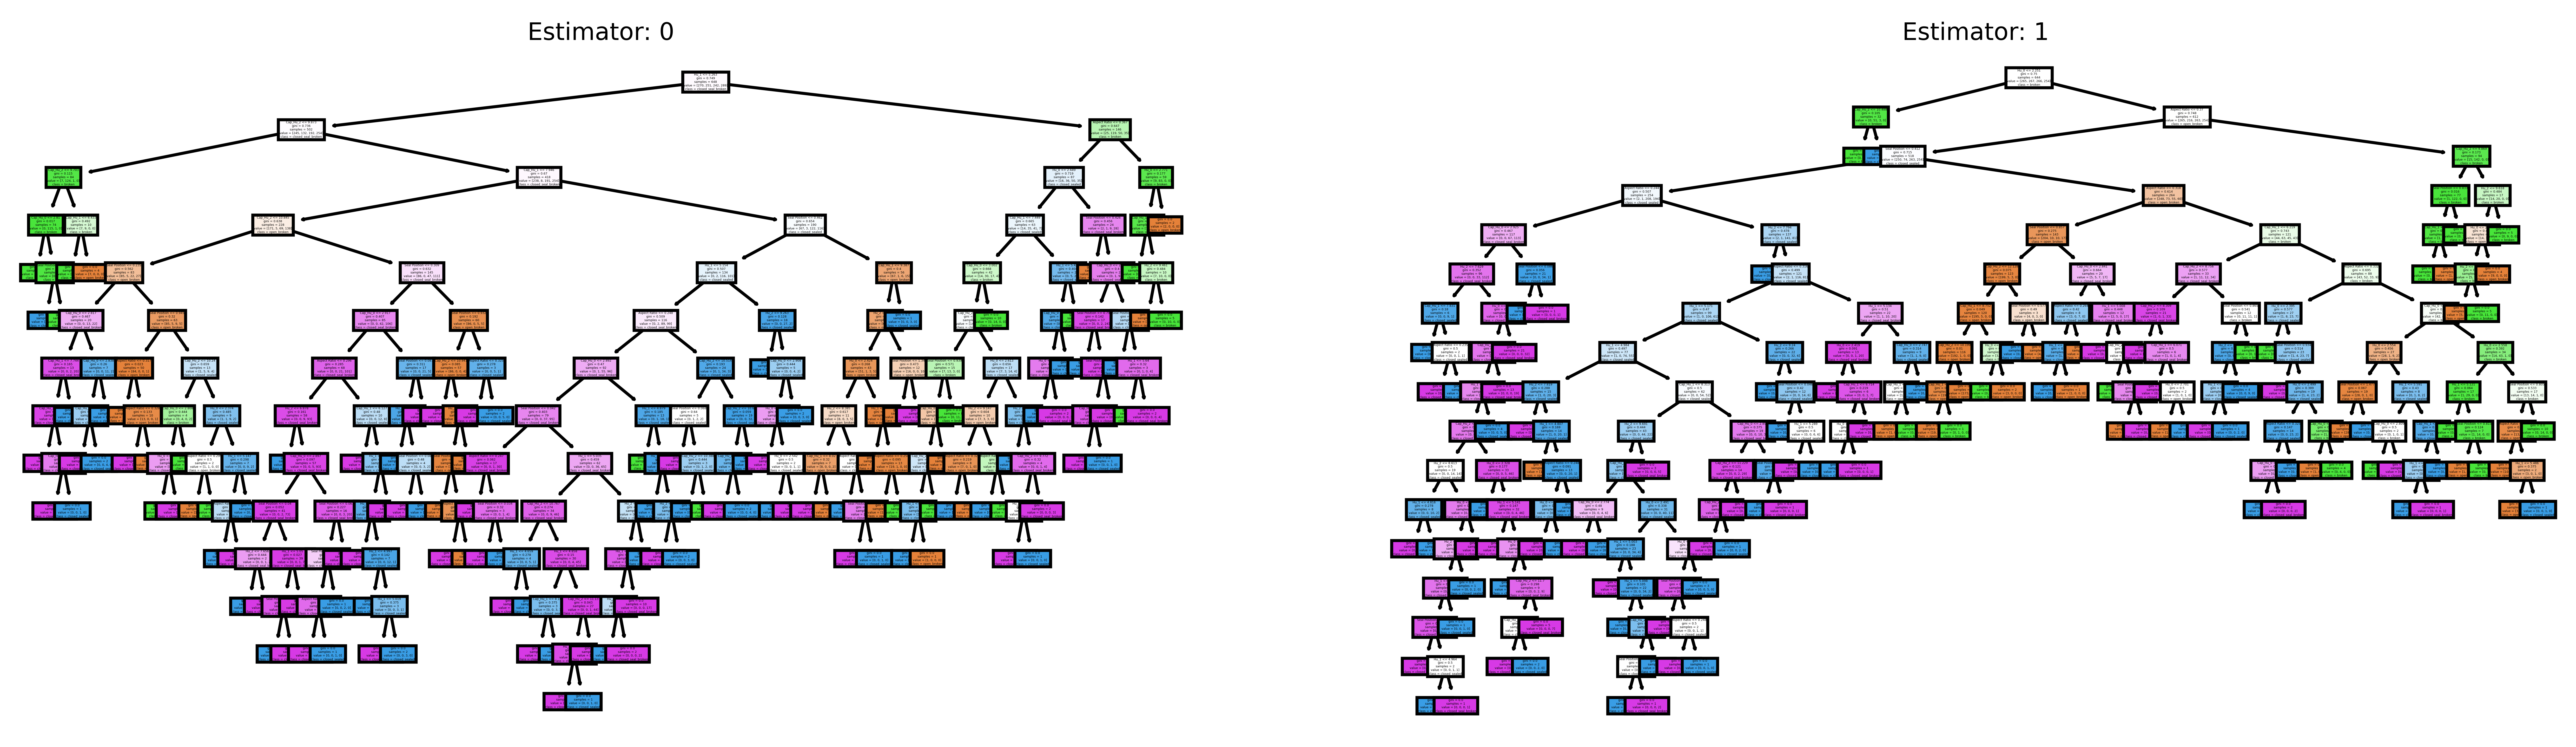

In [8]:
from sklearn import tree
feature_names = ['Aspect Ratio','Seal Position', 'Hu_0', 'Hu_1', 'Hu_2', 'Cap_Hu_0', 'Cap_Hu_1', 'Cap_Hu_2']

# creation of 2 subplots
fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (15,4), dpi=900)
for i in range (0,2):
    tree.plot_tree(random_forest.estimators_[i],feature_names=feature_names,class_names=class_names,filled=True,ax=axes[i])
    axes[i].set_title('Estimator: ' + str(i), fontsize = 8)

fig.savefig('analysis/random_forest_classifier.png')


Test on a test feature dataset

In [32]:
y_pred = random_forest.predict(data_test)
for i,elmt in enumerate(class_names):
    print(i,' means: ',elmt)

print('Prediced classes: ', y_pred)
print('Real classes',label_test)

0  means:  open_broken
1  means:  broken
2  means:  closed_sealed
3  means:  closed_seal_broken
Prediced classes:  [2 1 3 0]
Real classes [3 1 2 0]
